# Practical Data Analysis

## Lesson 1
***https://www.youtube.com/watch?v=AwIxx1nbQB4&ab_channel=SandroDiasPintoVitenti***

### Introduction

One could think that the main object of data analysis is a set of observations $ \{x_i\} $ and an existing relationship between these measurements. These assumptions are mainly a belief that there is a deeper reality besides the measurement. For us, this relation is materialized by the probability distribution $P$.

The probability of a measument $x$ given an a hypothesis $\theta$ is $$P(x|\theta).$$ There are two main methods of working in this space.

* Parametric methods: We know the probability distribuition, or at least we think so, then we can simulate a sample;

* Unparametric methods: We do not know the probability distribuition, therefore, we try to discover it via our observations set.



### Dataset description

We begin by describing our dataset. For instance, say we have a set observation of the position of galaxies in our sky. If we start by applying statistics to their actual position, we would be inclined to a specific probability distribution $P$. Moreover, if we decide to "clump" our galaxies into particular pixels, we would find a whole new distribution.

Furthermore, it is maximal that we correctly describe our data statistically. Let us say we have two different distributions:

$$.\;.\;.\;.\;.\;.\;.\;.\;.\;.\;.\; \{x_1\}$$

$$........... \{x_2\}$$

If we were to calculate the mean value of both, we would get the same value $\bar{x}$, but it is clear that these dataset are very diferent. Therefore, we must calculate other metrics.

### Computational methods

We shall use computational methods to generate a sample $\{x_i\}^N$ and calculate the value of $P(x)$ for every generated point. The first problem we will encounter is the fact that computers are intrinsically integer finite machines. 

The solution to our integrity problem lies in floating-point numbers. We shall give a tuple of an integer, and the position of the point. This is the definition of ***float values***!  (づ￣ ³￣)づ

Now, to solve the finiteness problem, we implement interpolation. Intead of calculating every value $P(x)$, we will use two calculated values for $(x_1;P(x_1))$ and $(x_2; P(x_2))$ to find a third without the explicit calculation $P(x_3)$. As an example, we can find the value of $P(x_3)$ via a linear interpolation 
$$ 
\bar{P}_1(x_3) = P_1 + (P_2 - P_1)\frac{(x_3-x_1)}{(x_2-x_1)} \;;\; x_1<x_3<x_2
$$

Then, our fucntion will be described by

$$
P(x) = \left\{
    \begin{array}\\
        P(x_1) & \mbox{if } \ x = x_1 \\
        \bar{P}_1(x_3) & \mbox{if } \ x = x_3 \\
        P(x_2) & \mbox{if } \ x=x_2 \\
        \vdots
    \end{array}
\right.
$$

We could use interpolation of a greater order. However, these methods are much more complex and require descriptions of the differential of $\bar{P}(x)$  to impose continuity of the function.

### Random varibles

Given a probability distribution $P(x)$, we define

$$
C(x) = \int_a^b P(x) dx.
$$

Furthermore, let us say $x$ is a random variable, with an expected value

$$
<x> = \int P(x) x dx.
$$

Therefore, if $x$ is a random variable, then $C(x)$ will also be a random variable. Moreover, we might ask what is the probability of $C(x)$ be equal a certain value. This will give us a probability distribuition for $C$, 

$$
P(C = C_0) = \int P(x) \delta(C(x) - C_0(x)) dx.
$$

This integral is easy to solve. By the definition of $C(x)$, we know $\partial_x C(x) = P(x)$. Since the probability distribution is a positive definite function, $C(x)$ is a monotonic function, i.e., $C$ is an inversible function. Now, because $C$ is inversible, the argument of the Dirac's delta function is defined on only one point $C(x_0) = C_0$. Replacing $C_0(x)$ by $C(x_0)$ on the integral, and using the fact that

$$
\delta(f(x)) = \frac{\delta(x-x_0)}{\left|\frac{\partial f(x_0)}{\partial x}\right|},
$$

we get

$$
P(C = C_0) = \frac{P(x_0)}{\left|\frac{\partial C(x_0)}{\partial x}\right|} = 1.
$$

This confirms that our distribution gives the equal probability for every possible value of our dataset.

Now we can calculate $C(x)$ using a set $\{x_i , C_i\}$. Not only $C(x)$, we can also calculate $\widetilde{X}(C)$, using the fact that $C(x)$ is inversible. We are doing all this to get a random sample. Since a computer can give an algorithm that takes a random sample from a uniform distribution, we do not need to know how to choose values for the calculation of $P(x)$. Therefore, given an uniform distribution $U(a, b) \rightarrow \{U_i\}$, we can generate a random sample ${X_i} = \widetilde{X}(U_i)$

### Activity 1

Firstly, using the Gaussian distribution

$$
P(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}}\frac{e^{-\frac{\left(x-\mu\right)^2}{2\mu^2}}}{\sigma},
$$

and

$$
C(x) \propto Erf.
$$

Calculate the interpolated version of $P(x|\mu, \sigma)$ and $C(x)$, and compare them with the same functions in the library of your choice.

Secondly, using a random sample generator from a uniform distribution, generate a random sample for $\widetilde{X}(U_i)$ and plot barplot over a continuous version of the Gaussian distribution (interpolated and library given).

In [4]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def gaussian_distribution(x: float, mu: float, sigma: float) -> float:
    return np.exp(((-(x - mu)**2)/ 2 * mu**2))/ sigma * (2*np.pi)**(1/2)

def linear_interpolation():
    return None

def mean(values: list) -> float:
    '''
    Takes a list of 
    '''
    
    m = 0
    for value in values:
        m = m + value    
    return m/len(values)

In [45]:
mean([1,2,3,4,5])

3.0

Text(0.5, 0, 'Sample')

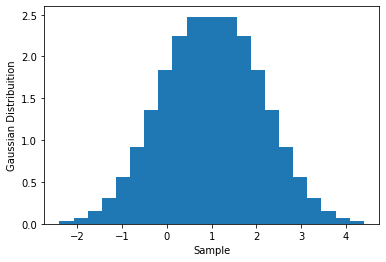

In [51]:
mu = 1
sigma = 1

x = []
probability = []

for i in np.linspace(-2, 4, 20):
    x.append(i)
    probability.append(gaussian_distribution(i, mu, sigma))

plt.bar(x, probability)
plt.ylabel('Gaussian Distribuition')
plt.xlabel('Sample')

In [49]:
## _x and _probability are interpolated variables
_probability = []
_x = []

for i in range(len(x) - 1):
    print(x[i], mean([x[i],x[i+1]]), x[i+1])
    
    

-2.0 -1.8421052631578947 -1.6842105263157894
-1.6842105263157894 -1.526315789473684 -1.368421052631579
-1.368421052631579 -1.210526315789474 -1.0526315789473686
-1.0526315789473686 -0.8947368421052633 -0.736842105263158
-0.736842105263158 -0.5789473684210527 -0.42105263157894735
-0.42105263157894735 -0.26315789473684215 -0.10526315789473695
-0.10526315789473695 0.05263157894736825 0.21052631578947345
0.21052631578947345 0.36842105263157876 0.5263157894736841
0.5263157894736841 0.6842105263157894 0.8421052631578947
0.8421052631578947 1.0 1.1578947368421053
1.1578947368421053 1.3157894736842104 1.4736842105263155
1.4736842105263155 1.6315789473684208 1.789473684210526
1.789473684210526 1.9473684210526312 2.1052631578947363
2.1052631578947363 2.2631578947368416 2.421052631578947
2.421052631578947 2.578947368421052 2.7368421052631575
2.7368421052631575 2.894736842105263 3.052631578947368
3.052631578947368 3.2105263157894735 3.3684210526315788
3.3684210526315788 3.526315789473684 3.68421052

### Likelihood

*For further reading, see* ***https://sites.warnercnr.colostate.edu/gwhite/wp-content/uploads/sites/73/2017/04/BinomialLikelihood.pdf*** 

Say we have a certain event with $P$ probability of happening. With $n$ occurencies, this particular event happended $r$ times, the likelihood will be given by

$$
\mathcal{L}(p|n, r) =\binom{n}{r} p^r (1-p)^{n-r}.
$$